In [14]:
import keras
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
from keras import optimizers
from numpy import array 
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
from os import listdir,makedirs
from os.path import isfile,join
import glob
import cv2
from skimage import feature 
from skimage.feature import local_binary_pattern
from keras import backend as K
from keras import losses
from keras import metrics
import tensorflow as tf


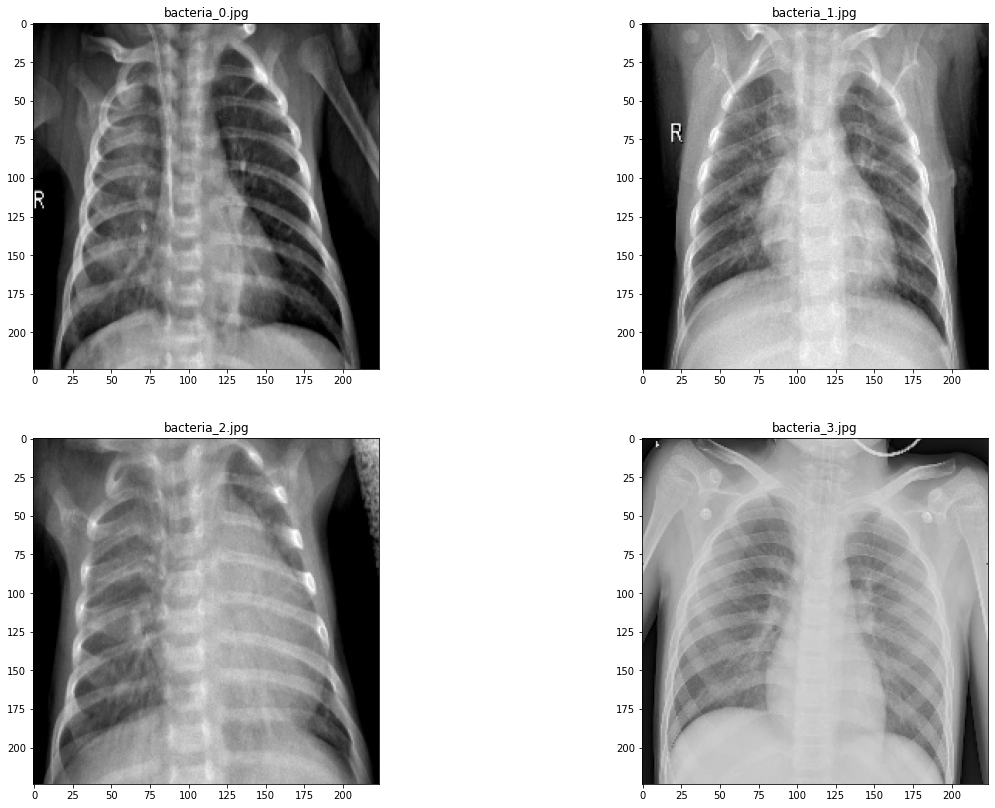

In [15]:
# path to your image folder of 4 images just to test run your code. 
#It is optional.
dir_images = r'D:\Opencv for Canny Edge detection_CLAHE_LBP\DATASET\LBP\tes'

imgs = os.listdir(dir_images)

fig = plt.figure(figsize=(20,14))
for count, imgnm in enumerate(imgs,1):
    image = plt.imread(os.path.join(dir_images,imgnm))
    ax = fig.add_subplot(2,len(imgs)/2,count)
    ax.imshow(image)
    ax.set_title(imgnm)
plt.show()

In [16]:
def getLBPimage(image):
    '''
    == Input ==
    gray_image  : color image of shape (height, width)
    
    == Output ==  
    imgLBP : LBP converted image of the same shape as 
    '''
    ### Step 0: Step 0: Convert an image to grayscale

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imgLBP = np.zeros_like(image)
    neighboor = 3 
    for ih in range(0,image.shape[0] - neighboor):
        for iw in range(0,image.shape[1] - neighboor):
            ### Step 1: 3 by 3 window pixel
            img          = image[ih:ih+neighboor,iw:iw+neighboor]
            center       = img[1,1]
            img01        = (img >= center)*1.0
            img01_vector = img01.T.flatten()
            
            # it is ok to order counterclock manner
            ### Step 2: **Binary operation**:
            
            img01_vector = np.delete(img01_vector,4)
            
            ### Step 3: Decimal: Convert the binary operated values to a digit.
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    return(imgLBP)

In [17]:
# path to your image folder
path_1 = r'D:\Opencv for Canny Edge detection_CLAHE_LBP\DATASET\LBP\raw\viral'

imgs = os.listdir(path_1)
paths_list = [path_1]

# path to your destination folder

dstpath = r'D:\Opencv for Canny Edge detection_CLAHE_LBP\DATASET\LBP\lbp\viral'

for imgnm in imgs:
    gray_image = plt.imread(os.path.join(path_1,imgnm))
    
    imgLBP    = getLBPimage(gray_image)
   
    vecimgLBP = imgLBP.flatten()
    
for path in paths_list:
    
    files = [f for f in listdir(path) if isfile(join(path,f))]
for image in files:
    try:   
        dstPath = join(dstpath, image)
        cv2.imwrite(dstPath, imgLBP)
    except:
        print ("{} is not converted".format(image))